# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**KAMOGELO RAMODUBJANE, SETE**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pickle
import seaborn as sns
import warnings
import statsmodels.formula.api as sm
from datetime import datetime

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from statsmodels.graphics.correlation import plot_corr
# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = '###'

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` and `df_test`file into a DataFrame. |

---

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/thabotladi/load-shortfall-regression-predict-api/master/Advanced_Regression/Advanced-Regression-Starter-Data/df_train.csv', index_col=0)
df_test = pd.read_csv('https://raw.githubusercontent.com/thabotladi/load-shortfall-regression-predict-api/master/Advanced_Regression/Advanced-Regression-Starter-Data/df_test.csv', index_col=0)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [4]:
# look at data statistics
df_train.shape

(8763, 48)

In [5]:
df_train.head(3)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667


In [6]:
df_train.describe()


,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [6]:
df_train.isnull().sum().sort_values(ascending=False)

Valencia_pressure       2068
Unnamed: 0                 0
Madrid_weather_id          0
Bilbao_pressure            0
Seville_weather_id         0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humidity          0
Valencia_temp_min          0
Barcelona_temp_max         0
Madrid_temp_max            0
Barcelona_temp             0
Bilbao_temp_min            0
Bilbao_temp                0
Barcelona_temp_min         0
Bilbao_temp_max            0
Seville_temp_min           0
Madrid_temp                0
Madrid_temp_min            0
Barcelona_weather_id       0
Valencia_snow_3h           0
time                       0
Barcelona_rain_3h          0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_sp

In [7]:
df_train.Valencia_pressure.describe()

count    6695.000000
mean     1012.051407
std         9.506214
min       972.666667
25%      1010.333333
50%      1015.000000
75%      1018.000000
max      1021.666667
Name: Valencia_pressure, dtype: float64

## KAMOGELO 

In [8]:
# plot relevant feature interactions

##Kamo

In [8]:
df = pd.concat([df_train, df_test])
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [9]:
df.shape

(11683, 48)

In [10]:
df.tail(5)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,...,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,...,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,...,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,...,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,0.0,...,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


In [11]:
df_train.isnull().sum().sort_values(ascending=False)

Valencia_pressure       2068
time                       0
Madrid_wind_speed          0
Bilbao_pressure            0
Seville_weather_id         0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humidity          0
Valencia_temp_min          0
Barcelona_temp_max         0
Madrid_temp_max            0
Barcelona_temp             0
Bilbao_temp_min            0
Bilbao_temp                0
Barcelona_temp_min         0
Bilbao_temp_max            0
Seville_temp_min           0
Madrid_temp                0
Madrid_temp_min            0
Barcelona_weather_id       0
Madrid_weather_id          0
Valencia_snow_3h           0
Barcelona_wind_speed       0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds

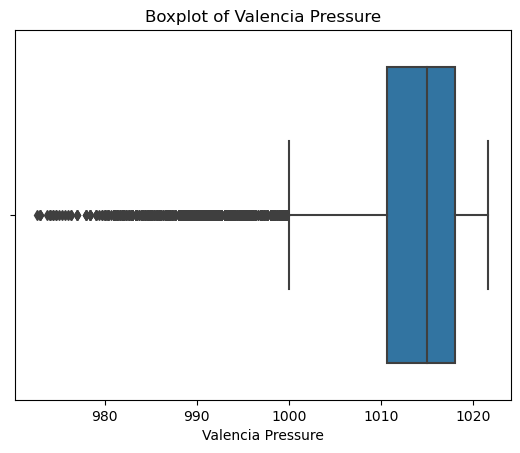

In [12]:
sns.boxplot(x=df['Valencia_pressure'])

# Set plot labels and title
plt.xlabel('Valencia Pressure')
plt.title('Boxplot of Valencia Pressure')

# Show the plot
plt.show()

In [13]:
print('Mode')
print(df['Valencia_pressure'].mode())
print('Mean')
print(df['Valencia_pressure'].mean())
print('Median')
print(df['Valencia_pressure'].median())

Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Mean
1012.3466870428987
Median
1015.0


In [14]:
df_train.Valencia_pressure.describe()

count    6695.000000
mean     1012.051407
std         9.506214
min       972.666667
25%      1010.333333
50%      1015.000000
75%      1018.000000
max      1021.666667
Name: Valencia_pressure, dtype: float64

In [15]:
df_clean = df
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [16]:
df_clean.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [17]:
df_clean.dtypes

time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia

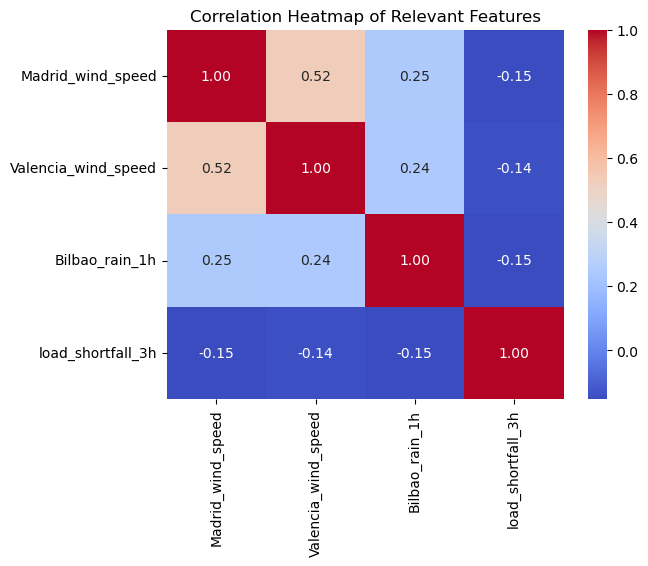

In [20]:
relevant_features = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_rain_1h', 'load_shortfall_3h']
df_relevant = df[relevant_features]
correlation_matrix = df_relevant.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Relevant Features')
plt.show()

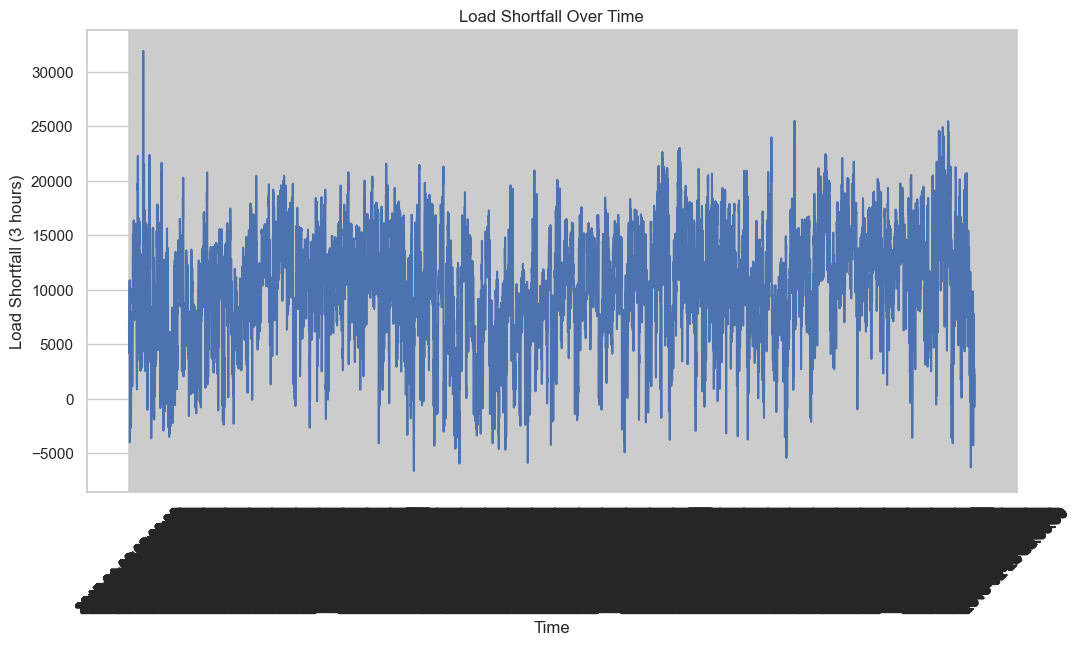

In [32]:
sns.set(style="whitegrid")

# Plotting a line plot for 'time' and 'load_shortfall_3h'
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='load_shortfall_3h', data=df)
plt.title('Load Shortfall Over Time')
plt.xlabel('Time')
plt.ylabel('Load Shortfall (3 hours)')
plt.xticks(rotation=45)
plt.show()

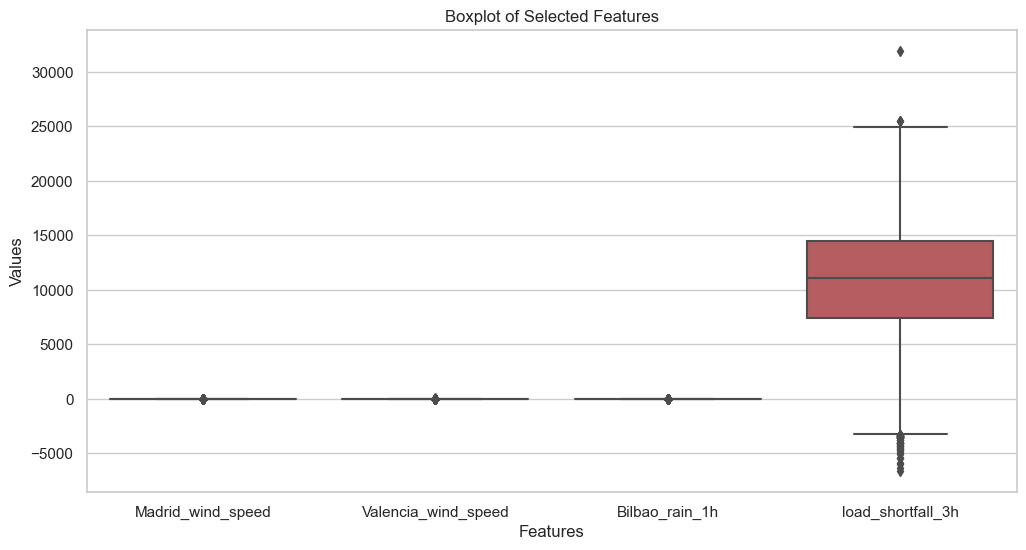

In [33]:
features_to_plot = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_rain_1h', 'load_shortfall_3h']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features_to_plot])
plt.title('Boxplot of Selected Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

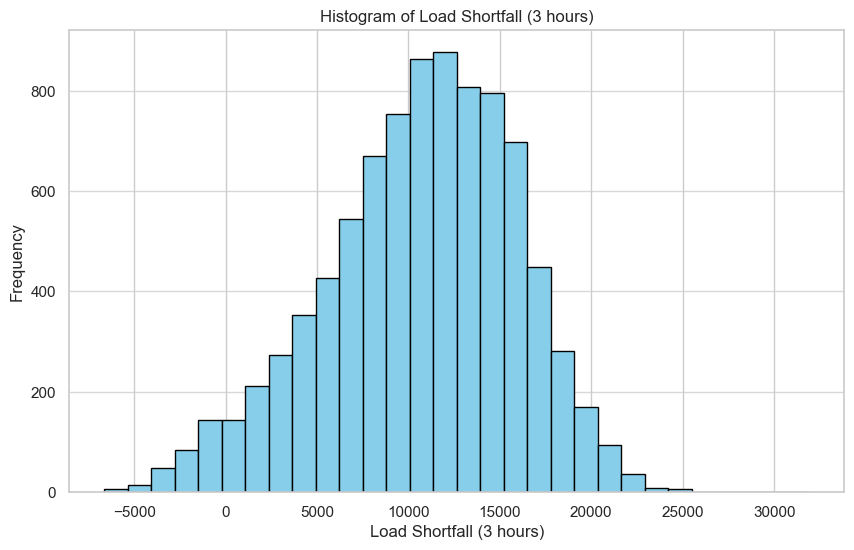

In [34]:
column_to_plot = 'load_shortfall_3h'

# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(df[column_to_plot], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Load Shortfall (3 hours)')
plt.xlabel('Load Shortfall (3 hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [9]:
# evaluate correlation
##kamo (seabron)
corr = df_train.drop(['Seville_pressure','Valencia_wind_deg','time'], axis='columns').corr()

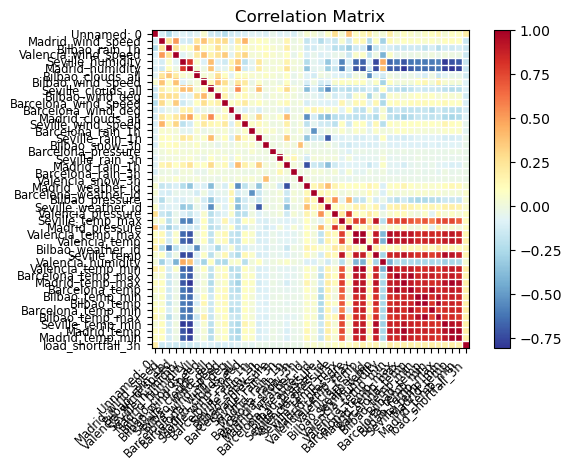

In [10]:
fig=plot_corr(corr,xnames=corr.columns)

array([[<AxesSubplot:title={'center':'Madrid_wind_speed'}>,
        <AxesSubplot:title={'center':'Bilbao_rain_1h'}>,
        <AxesSubplot:title={'center':'Valencia_wind_speed'}>,
        <AxesSubplot:title={'center':'Seville_humidity'}>],
       [<AxesSubplot:title={'center':'Madrid_humidity'}>,
        <AxesSubplot:title={'center':'Bilbao_clouds_all'}>,
        <AxesSubplot:title={'center':'Bilbao_wind_speed'}>,
        <AxesSubplot:title={'center':'Seville_clouds_all'}>],
       [<AxesSubplot:title={'center':'Bilbao_wind_deg'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_deg'}>,
        <AxesSubplot:title={'center':'Madrid_clouds_all'}>],
       [<AxesSubplot:title={'center':'Seville_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_1h'}>,
        <AxesSubplot:title={'center':'Seville_rain_1h'}>,
        <AxesSubplot:title={'center':'Bilbao_snow_3h'}>],
       [<AxesSubplot:title={'center':'Bar

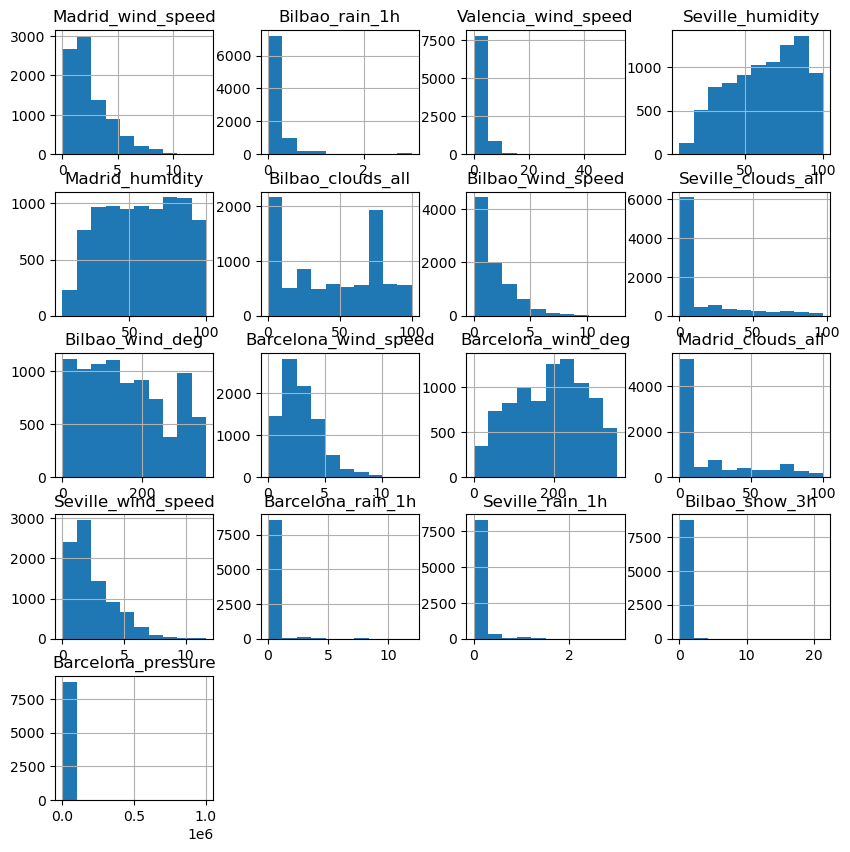

In [11]:
# have a look at feature distributions

features = ['Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure']

df_train[features].hist(figsize=(10,10))

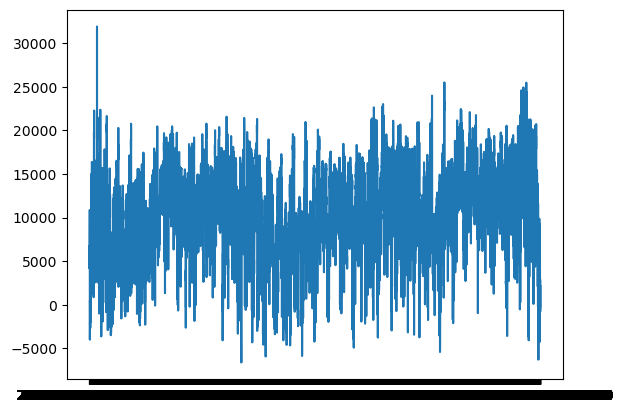

In [12]:
# plot the load shortfall against time
plt.plot(df_train['time'],df_train['load_shortfall_3h'])
plt.show()

In [13]:
print(df_train['time'].min())
print(df_train['time'].max())

2015-01-01 03:00:00
2017-12-31 21:00:00


In [14]:
#yearly time series data
monthly_shortfall = pd.DataFrame(df_train[df_train['time'] <'2015-01-31'])

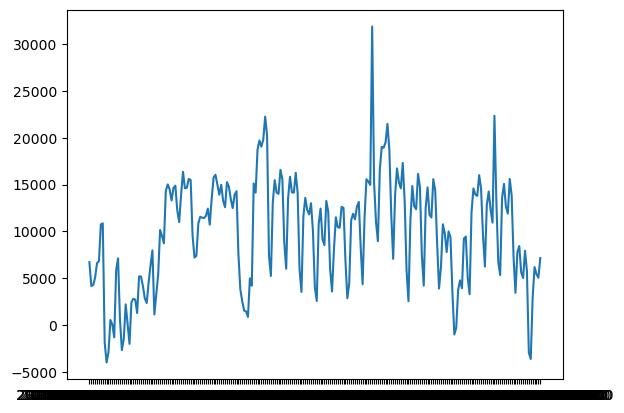

In [15]:
plt.plot(monthly_shortfall['time'],monthly_shortfall['load_shortfall_3h'])
plt.show()

In [16]:
#Target scatter
##Kamo  plot scatter splot between features and the Target Variable. 


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [17]:
# remove missing values/ features
    #Katlego

In [18]:
# create new features
    #Thembi

In [36]:
# engineer existing features
    #DLX - write a function that takes any Dataframe and return a scaled/regularised Dataframe
    #dvhdzvh
df = df_train.select_dtypes(include='number')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df[df.abs() < np.finfo(np.float64).max]
df.dropna(inplace=True)


X = df.drop('load_shortfall_3h',axis=1)
y = df['load_shortfall_3h']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()
    

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,-1.737658,-1.028618,-0.387403,-0.837516,0.551849,0.369904,-1.491588,-0.536339,-0.60991,0.543444,...,-1.591652,-2.602350,-1.569013,-2.551900,-2.686838,-1.424805,-2.760779,-2.293929,-2.599432,-2.474837
1,-1.737260,-1.201918,-0.387403,-0.444894,0.724293,0.397331,-1.491588,-0.536339,-0.60991,0.521175,...,-1.655056,-2.555800,-1.640211,-2.391899,-2.531009,-1.501051,-2.612729,-2.208322,-2.550710,-2.425763
2,-1.736861,-0.855318,-0.387403,-0.706642,0.422516,0.383617,-1.491588,-0.536339,-0.60991,0.457548,...,-1.511484,-1.899877,-1.478991,-1.674517,-1.832333,-1.328399,-1.948929,-1.731258,-1.864181,-1.734272
3,-1.736463,-0.855318,-0.387403,-0.706642,0.163851,0.054503,-1.491588,-0.536339,-0.60991,0.317568,...,-1.251534,-0.946750,-1.187087,-0.732475,-0.914855,-1.015793,-1.077250,-0.912549,-0.866580,-0.729460
4,-1.735268,-0.855318,-0.387403,-0.706642,0.954218,0.342478,-0.975729,-0.536339,-0.60991,0.419371,...,-1.253468,-2.358635,-1.189259,-1.787384,-1.942257,-1.018120,-2.053366,-1.874489,-2.344346,-2.217907


In [32]:
! pip install scikit-learn

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
intercept = float(lasso.intercept_)
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
coeff

#KJDVSDJHDJHDS

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.218e+10, tolerance: 1.455e+07
  model = cd_fast.enet_coordinate_descent(


,Coefficient
Unnamed: 0,-14.427873
Madrid_wind_speed,-386.410732
Bilbao_rain_1h,-134.218747
Valencia_wind_speed,-270.307033
Seville_humidity,-1063.861038
Madrid_humidity,-11.565330
Bilbao_clouds_all,-101.026392
Bilbao_wind_speed,-42.660869
Seville_clouds_all,96.116658
Bilbao_wind_deg,-363.364637


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [242]:
# split data
df_test = pd.read_csv('df_test.csv')
df_train.columns


Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [244]:
# create targets and features dataset

selected_cols = ['Bilbao_wind_speed','Barcelona_wind_deg','Barcelona_pressure','Valencia_wind_speed','Madrid_pressure','Valencia_humidity','Barcelona_temp_min','Madrid_temp','Madrid_temp_min','load_shortfall_3h']
model_cols = df_train[selected_cols]
    

targets = model_cols[['load_shortfall_3h']]
features = model_cols.drop(['load_shortfall_3h'],axis =1)


In [245]:
# Usnig Stats Models
#regression string
formula_str = targets.columns[0]+' ~ '+'+'.join(features.columns)
formula_str

'load_shortfall_3h ~ Bilbao_wind_speed+Barcelona_wind_deg+Barcelona_pressure+Valencia_wind_speed+Madrid_pressure+Valencia_humidity+Barcelona_temp_min+Madrid_temp+Madrid_temp_min'

In [246]:
# create one or more ML models
lm = LinearRegression()

#linear regression model from Stats models
model=sm.ols(formula=formula_str, data=model_cols)

In [247]:
# evaluate one or more ML models
lm.fit(features,targets)

#linear regression from stats models
fitted = model.fit()

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [248]:
# Compare model performance
beta_0 = float(lm.intercept_)
beta_js = pd.DataFrame(lm.coef_[0], features.columns, columns=['Coefficient'])


In [249]:
#model performance summary from Stats Models
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     83.24
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          5.48e-149
Time:                        15:05:20   Log-Likelihood:                -87084.
No. Observations:                8763   AIC:                         1.742e+05
Df Residuals:                    8753   BIC:                         1.743e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.688e+04   4

In [250]:
# my_comment_adding predictions
test_cols = df_test[selected_cols[:-1]]
load_predictions = fitted.predict(test_cols)

In [251]:
#save predictions
predictions = list(load_predictions)
csv_dict  = {
    'time': list(df_test['time']),
    'load_shortfall_3h': predictions
}

(pd.DataFrame.from_dict(data=csv_dict, orient='index').to_csv('predictions_v4.csv', header=False))



In [111]:
# Choose best model and motivate why it is the best choice


(2920, 48)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic